Deep Learning Neural networks introduction

By : Maddy

**Background**:

The idea of neural network was first stirked in the year 1957 in the form of percetron(single neuron). In 1986 Hinton gave the concept of back propogation but at that time due to lack of resources the training of deep neural networks was not feasible then with the advancement of resources(memory and computation power) the neural networks got powerful and deeper.

**Inspiration**: 

Artificial neural networks are inspired by biological neural networks. Biological neuron has nucleus which acts as activation function and it has dendrites which acts as input vectors and the output is axon. The thicker the dendrite is the more important the feature is. And in artificial neural network the thickness of a dendrite is determined by the weight vector.
Biological neural networks is a group of interconnected neurons.


**Logistic Regression and Preceptron:**

Perceptron is a single artificial neural with threshold activation function on the other hand if we make this threshold activation into sigmoid then it will act as logistic regression.

**Why Multilayer Perceptron? **

1. Biological Inspiration.

2. Mathematical inspiration:  More the depth , more complex functions can be fitted into it.

**Training** a neural network means finding the best and optiomal weight vector.

**Back propogation:**

1. **Initialize weights:** This can be done randomly or any method can be used.

2. 

       2.1 Forward propogation:  Sending data forward through the network.
       
       2.2 At output compute loss.
       
       2.3 Compute all the required derivatives.
       
       2.4 Update weights starting from the end of the network.
       
3. Repeat step 2 till convergence.

Convergence is when the new weight vector is similar to the old one.

When all the training points traverse through the network once is known as one epoch.

Back propogation only works when the activation function is differentiable.





**Memoization**:

If there is any operation that is used multiple times repeatedly then compute it once, store it and reuse it. In case of Back propogation some derivatives will be required again repeatedly so there memoization can be used.

**Vanishing Gradients:**

Multiplication of small derivatives leads to very smaller gradients and that means the change in new and old weight vector won't be there. This is vanishing gradient problem.

**Exploding gradient:**

When larger dervatives multiplies then the result is larges which do not let the weights to converge.

**Activation Functions:**

Provide non linearity to the network. Sigmoid and Tanh functions are differentiable and their derivative can be represented in their form itself.

**RELU (Rectified Linear Units)**: To avoid vanishing and exploding gradient problem this is the most famous activation functions these days. f(z)=maz(0,z) Here also we have a dying relu problem so to overcome these there are other versions of relu such as leaky relu etc.

**DroupOut**: Droupout technique is used as a regularization in deep neural networks so as to reduce overfitting. In this technique some of the neurons get shut down and they are not a part of any forward or backward pass in a particular iteration. But while testing all the neurons are present and their weights are mulltiplied with the frequency of activation while training.

**Batch Normalization**:  It refers to implementation of normalisation in deep layers of neural networks. As the networks gets complex the inputs of subsequent layers starts to get shift from the original scale so by normalising the inputs of some layers this can be avoided. This shifting is known as internal covariate shift. Batch Normalization helps in training the model faster as larger learning rate can be used and it also acts as weak regularizer. It performs shifting and scaling using alpha and beta parameters while are to be learned while training. 
BN : alpha*xi' + beta. Here alpha and beta are parameters which are learned while training.


**Softmax Activation:** This is used in the final output layer of the network in case of multiple class classification. It gives the probality of output's belongingness to different classes.

**Epoch**: When whole of the input data itrerate once through the network is known as one epoch.

**Weight Initialization: **This is very important as this can decide that which way our model should work. initial weights should not be biased. There are different techniques for weight initialization such as Uniform Initilization, Xavier/Glorot Initialization , He Iniatialization etc.

These uses two terms fan-in and fan-out:

**Fan-in**: Number of inputs to a neuron.

**Fan-out**: Number of outputs from a neuron.

**Optimizers**: The way to reach convergence i.e minima or maxima.

**Convex function:** These functions have only one minima or one maxima.

**Non-convex function:**  These function have multiple minima and maxima known as local minima and maxima.

At minima and maxima the slope is 0. But at saddle point also the slope is 0. So weight initialization play a important role here..

**SGD: Stochastic Gradient Descent:** This is a technique to update weights using gradients(slope) ti reach the convergence point.

**Momentum**: This is a technique used to faster the convergence speed and uses the concept of weighted sum. It has a parameter alpha that can be between 0 to 1.

**Vt = Alpha Vt-1 + learning rate. gradient**

**Wt = Wt-1 - Vt**

**Nesterov Accelerated Gradient (NAG)**: This is just a modification of above . It first calculates momentum and then gradient over that.
ALmost both the approaches' results are similar.

**AdaGrad (Adaptive Gradients):** It tweaks with the learning i.e it makes the learning rate adaptive as per the gradients. So no need to manually tune the learning rate. But sometime it can lead to very small learning rate resulting in slower convergence.

**Adadelta:** This optimizer overcomes the problems of adagrad i.e very small learning rates. It uses Exponentially Decaying Averages of gradients to calculate learning rates.

**Adam**: It uses Exponiantially decaying Averages of gradients and gradient squares. It is the most famous and fast optimizer of today.

**Bias variance tradeoff Neural Networks:**

If number of layers increases there will be more weight and that leads to overfitting and higher variance.

If the number of layers is less then less weights will be there and that leads to underfitting and higher bias.

-----

In [0]:
#importing dependencies
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation 
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
%matplotlib inline
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
#Normalization
X_train = X_train/255
X_test = X_test/255

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

In [0]:
# Multilayer perceptron first type

model_first = Sequential()
model_first.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_first.add(BatchNormalization())
model_first.add(Dropout(0.5))

model_first.add(Dense(128, activation='relu'))
model_first.add(BatchNormalization())
model_first.add(Dropout(0.5))

model_first.add(Dense(64, activation='relu'))
model_first.add(BatchNormalization())

model_first.add(Dense(output_dim, activation='softmax'))

model_first.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)  

In [0]:
model_first.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_first.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 128us/step - loss: 1.0554 - acc: 0.6661 - val_loss: 0.3752 - val_acc: 0.9008
Epoch 2/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.5414 - acc: 0.8390 - val_loss: 0.2736 - val_acc: 0.9233
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.4331 - acc: 0.8725 - val_loss: 0.2287 - val_acc: 0.9328
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3742 - acc: 0.8893 - val_loss: 0.2023 - val_acc: 0.9403
Epoch 5/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3373 - acc: 0.9004 - val_loss: 0.1840 - val_acc: 0.9443
Epoch 6/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3082 - acc: 0.9078 - val_loss: 0.1719 - val_acc: 0.9482
Epoch 7/20
60000/60000 [==============================] - 5s 79us/step - loss: 

Test score: 0.10245912347100675
Test accuracy: 0.9694


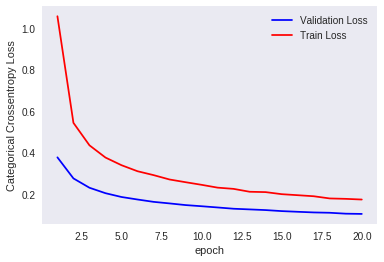

In [0]:
score = model_first.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# Multilayer perceptron second type

model_second = Sequential()
model_second.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_second.add(BatchNormalization())
model_second.add(Dropout(0.5))

model_second.add(Dense(128, activation='relu'))
model_second.add(BatchNormalization())
model_second.add(Dropout(0.5))

model_second.add(Dense(128, activation='relu'))
model_second.add(BatchNormalization())
model_second.add(Dropout(0.5))

model_second.add(Dense(64, activation='relu'))
model_second.add(BatchNormalization())
model_second.add(Dropout(0.5))

model_second.add(Dense(output_dim, activation='softmax'))

model_second.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
__________

In [0]:
model_second.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_second.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 111us/step - loss: 1.7582 - acc: 0.4346 - val_loss: 0.5568 - val_acc: 0.8405
Epoch 2/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.9278 - acc: 0.6945 - val_loss: 0.3803 - val_acc: 0.8963
Epoch 3/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.7127 - acc: 0.7770 - val_loss: 0.2958 - val_acc: 0.9177
Epoch 4/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.5946 - acc: 0.8220 - val_loss: 0.2517 - val_acc: 0.9260
Epoch 5/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.5273 - acc: 0.8450 - val_loss: 0.2280 - val_acc: 0.9306
Epoch 6/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.4822 - acc: 0.8610 - val_loss: 0.2084 - val_acc: 0.9379
Epoch 7/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.4335 - acc: 0.8741 - val_loss: 0.1943 - val_ac

Test score: 0.08783440432427451
Test accuracy: 0.9773


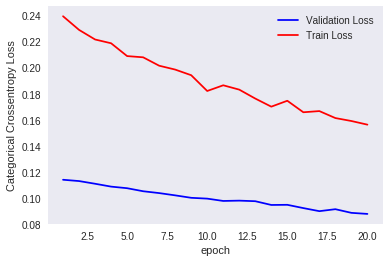

In [0]:
score = model_second.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
# Multilayer perceptron third type

model_third = Sequential()
model_third.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_third.add(BatchNormalization())


model_third.add(Dense(128, activation='relu'))
model_third.add(BatchNormalization())


model_third.add(Dense(128, activation='relu'))
model_third.add(BatchNormalization())


model_third.add(Dense(64, activation='relu'))
model_third.add(BatchNormalization())


model_third.add(Dense(64, activation='relu'))
model_third.add(BatchNormalization())
model_third.add(Dropout(0.5))

model_third.add(Dense(64, activation='relu'))
model_third.add(BatchNormalization())
model_third.add(Dropout(0.5))

model_third.add(Dense(output_dim, activation='softmax'))

model_third.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_16 (Batc (None, 128)               512       
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
__________

In [0]:
model_third.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_third.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 174us/step - loss: 1.1540 - acc: 0.6449 - val_loss: 0.2983 - val_acc: 0.9190
Epoch 2/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.4626 - acc: 0.8748 - val_loss: 0.1950 - val_acc: 0.9462
Epoch 3/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.3310 - acc: 0.9157 - val_loss: 0.1591 - val_acc: 0.9545
Epoch 4/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.2644 - acc: 0.9340 - val_loss: 0.1440 - val_acc: 0.9578
Epoch 5/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.2221 - acc: 0.9462 - val_loss: 0.1265 - val_acc: 0.9631
Epoch 6/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.1905 - acc: 0.9527 - val_loss: 0.1195 - val_acc: 0.9662
Epoch 7/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.1641 - acc: 0.9594 - val_loss: 0.1131 -

Test score: 0.09726882541918894
Test accuracy: 0.9768


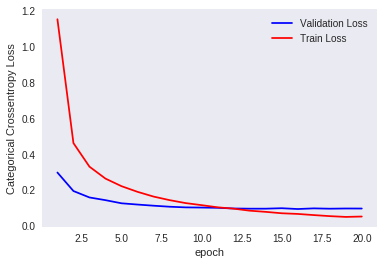

In [0]:
score = model_third.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Thank you**